In [113]:
import pandas as pd
import seaborn as sns
import numpy as np
df = pd.read_csv('ecommerce.csv')
df

User_ID  Product_ID        Category  Price (Rs.)  Discount (%)  \
0     337c166f  f414122f-e          Sports        36.53            15   
1     d38a19bf  fde50f9c-5        Clothing       232.79            20   
2     d7f5f0b0  0d96fc90-3          Sports       317.02            25   
3     395d4994  964fc44b-d            Toys       173.19            25   
4     a83c145c  d70e2fc6-e          Beauty       244.80            20   
...        ...         ...             ...          ...           ...   
3655  67abda0a  28714133-6          Beauty       486.79             0   
3656  34ebc1a0  08838c2c-9            Toys       212.87            15   
3657  1defd3b1  c39a4f16-6  Home & Kitchen       389.76             0   
3658  0611293d  b4f67f96-9     Electronics       447.66            30   
3659  e73ad07c  a5d07442-d  Home & Kitchen       235.77            30   

      Final_Price(Rs.)    Payment_Method Purchase_Date  
0                31.05       Net Banking    12-11-2024  
1               186.23       Net Banking    09-02-2024  
2               237.76       Credit Card    01-09-2024  
3               129.89               UPI    01-04-2024  
4               195.84       Net Banking    27-09-2024  
...                ...               ...           ...  
3655            486.79               UPI    14-05-2024  
3656            180.94  Cash on Delivery    19-11-2024  
3657            389.76       Net Banking    07-08-2024  
3658            313.36               UPI    21-05-2024  
3659            165.04               UPI    14-04-2024  

[3660 rows x 8 columns]

In [41]:
df.describe()

Price (Rs.)  Discount (%)  Final_Price(Rs.)
count  3660.000000   3660.000000       3660.000000
mean    254.800675     18.825137        206.906579
std     141.682621     14.731338        122.687844
min      10.090000      0.000000          5.890000
25%     134.012500      5.000000        104.512500
50%     253.845000     15.000000        199.185000
75%     377.595000     25.000000        304.117500
max     499.960000     50.000000        496.820000

<Axes: ylabel='Price (Rs.)'>

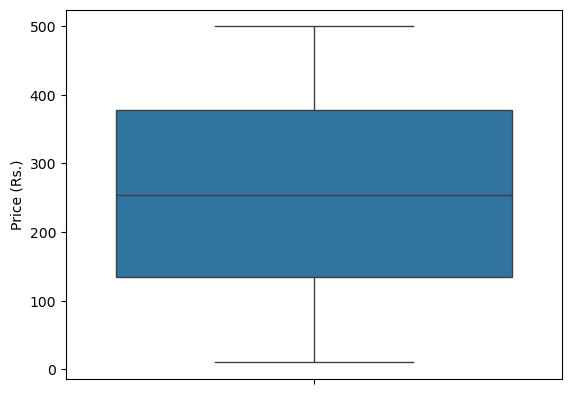

In [42]:
sns.boxplot(df['Price (Rs.)'])

In [43]:
df[['Category','Price (Rs.)','Discount (%)'	,'Final_Price(Rs.)']].groupby('Category').mean()

Price (Rs.)  Discount (%)  Final_Price(Rs.)
Category                                                   
Beauty           252.738693     18.475248        206.366535
Books            259.123052     19.035581        208.144850
Clothing         263.115913     17.919021        217.165424
Electronics      251.646867     19.267068        201.731386
Home & Kitchen   249.255938     19.608379        200.961894
Sports           258.619212     19.326923        208.689981
Toys             248.962772     18.126195        205.142811

In [44]:
df[['Price (Rs.)', 'Category', 'Payment_Method']].groupby(['Category', 'Payment_Method']).agg({'Price (Rs.)' : ['mean', 'min', 'max']})

Price (Rs.)               
                                       mean    min     max
Category       Payment_Method                             
Beauty         Cash on Delivery  271.400909  10.09  496.92
               Credit Card       228.366800  10.58  493.08
               Debit Card        254.208333  16.99  499.65
               Net Banking       269.255313  14.65  498.34
               UPI               243.336750  15.28  497.52
Books          Cash on Delivery  229.552039  15.79  496.31
               Credit Card       271.742477  12.31  494.16
               Debit Card        264.386095  13.49  499.36
               Net Banking       265.116916  15.04  487.32
               UPI               263.453364  11.78  498.73
Clothing       Cash on Delivery  269.924862  30.49  493.99
               Credit Card       272.513578  14.66  499.91
               Debit Card        253.251028  11.62  496.95
               Net Banking       252.457449  11.59  486.20
               UPI               266.204352  14.61  491.63
Electronics    Cash on Delivery  239.166957  18.56  496.76
               Credit Card       264.634667  16.08  488.92
               Debit Card        236.820808  14.58  481.88
               Net Banking       254.898000  11.60  490.91
               UPI               260.736078  11.16  477.51
Home & Kitchen Cash on Delivery  270.232083  10.82  498.59
               Credit Card       236.982605  10.37  492.64
               Debit Card        263.525385  18.79  496.82
               Net Banking       254.329643  14.23  499.03
               UPI               227.175763  15.48  485.75
Sports         Cash on Delivery  251.640755  10.33  497.98
               Credit Card       242.246372  16.81  496.79
               Debit Card        272.915983  11.94  497.40
               Net Banking       251.650879  10.78  499.96
               UPI               275.299247  17.86  495.55
Toys           Cash on Delivery  267.566593  12.32  494.30
               Credit Card       244.508857  11.54  498.37
               Debit Card        258.638807  12.15  498.58
               Net Banking       239.403571  14.98  499.00
               UPI               237.553868  11.62  491.44

In [45]:
category = df['Category'].value_counts()
category

Category
Home & Kitchen    549
Books             534
Clothing          531
Toys              523
Sports            520
Beauty            505
Electronics       498
Name: count, dtype: int64

In [46]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['Category'] = encoder.fit_transform(df['Category'])
df['Category'].value_counts()

Category
4    549
1    534
2    531
6    523
5    520
0    505
3    498
Name: count, dtype: int64

In [47]:
paiement = df['Payment_Method'].value_counts()
paiement

Payment_Method
Credit Card         760
UPI                 757
Debit Card          731
Net Banking         716
Cash on Delivery    696
Name: count, dtype: int64

In [48]:
df['Payment_Method'] = encoder.fit_transform(df['Payment_Method'])
df['Payment_Method'].value_counts()

Payment_Method
1    760
4    757
2    731
3    716
0    696
Name: count, dtype: int64

In [76]:
df['month'] = pd.to_datetime(df['Purchase_Date'], format = '%d-%m-%Y').dt.month
df[['Price (Rs.)', 'month']].groupby('month').agg({'Price (Rs.)' : 'mean'})

Price (Rs.)
month             
1       247.653882
2       274.279903
3       246.949549
4       254.842210
5       260.138769
6       240.828978
7       257.914046
8       256.136279
9       244.547690
10      261.055000
11      261.508735

<Axes: xlabel='month', ylabel='Price (Rs.)'>

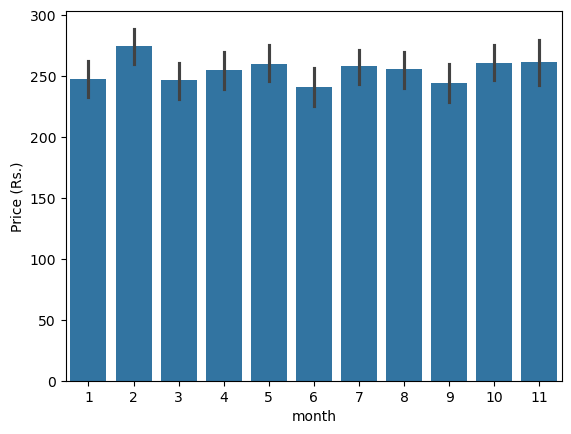

In [80]:
mean_price =df[['Price (Rs.)', 'month']].groupby('month').agg({'Price (Rs.)' : 'mean'}).reset_index()
sns.barplot(x= df['month'], y = df['Price (Rs.)'])

In [91]:
mean_price.rename(columns={'Price (Rs.)': 'Mean Price (Rs.)'}, inplace=True)

In [92]:
mean_price

month  Mean Price (Rs.)
0       1        247.653882
1       2        274.279903
2       3        246.949549
3       4        254.842210
4       5        260.138769
5       6        240.828978
6       7        257.914046
7       8        256.136279
8       9        244.547690
9      10        261.055000
10     11        261.508735

In [103]:
# Joindre le DataFrame avec les moyennes
curve = pd.DataFrame(df['month']).merge(mean_price, on='month', how='left')

# Trier par 'month'
curve = curve.sort_values(by='month', ascending=True)

# Supprimer les doublons
curve = curve.drop_duplicates()

print(curve)


      month  Mean Price (Rs.)
770       1        247.653882
1551      2        274.279903
1069      3        246.949549
1845      4        254.842210
3185      5        260.138769
3416      6        240.828978
2793      7        257.914046
787       8        256.136279
24        9        244.547690
3473     10        261.055000
1544     11        261.508735


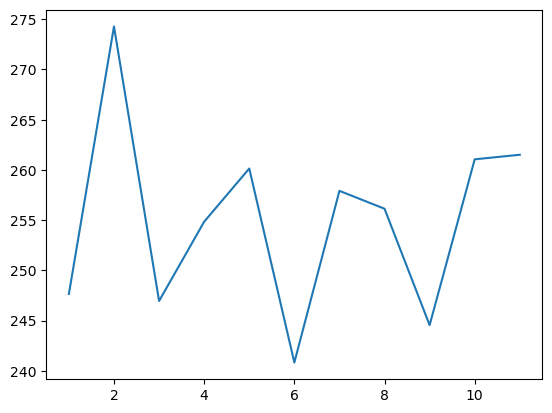

In [104]:
import matplotlib.pyplot as plt
x= curve['month']
y = curve['Mean Price (Rs.)']
plt.plot(x, y)

In [114]:
df

User_ID  Product_ID        Category  Price (Rs.)  Discount (%)  \
0     337c166f  f414122f-e          Sports        36.53            15   
1     d38a19bf  fde50f9c-5        Clothing       232.79            20   
2     d7f5f0b0  0d96fc90-3          Sports       317.02            25   
3     395d4994  964fc44b-d            Toys       173.19            25   
4     a83c145c  d70e2fc6-e          Beauty       244.80            20   
...        ...         ...             ...          ...           ...   
3655  67abda0a  28714133-6          Beauty       486.79             0   
3656  34ebc1a0  08838c2c-9            Toys       212.87            15   
3657  1defd3b1  c39a4f16-6  Home & Kitchen       389.76             0   
3658  0611293d  b4f67f96-9     Electronics       447.66            30   
3659  e73ad07c  a5d07442-d  Home & Kitchen       235.77            30   

      Final_Price(Rs.)    Payment_Method Purchase_Date  
0                31.05       Net Banking    12-11-2024  
1               186.23       Net Banking    09-02-2024  
2               237.76       Credit Card    01-09-2024  
3               129.89               UPI    01-04-2024  
4               195.84       Net Banking    27-09-2024  
...                ...               ...           ...  
3655            486.79               UPI    14-05-2024  
3656            180.94  Cash on Delivery    19-11-2024  
3657            389.76       Net Banking    07-08-2024  
3658            313.36               UPI    21-05-2024  
3659            165.04               UPI    14-04-2024  

[3660 rows x 8 columns]

<Axes: >

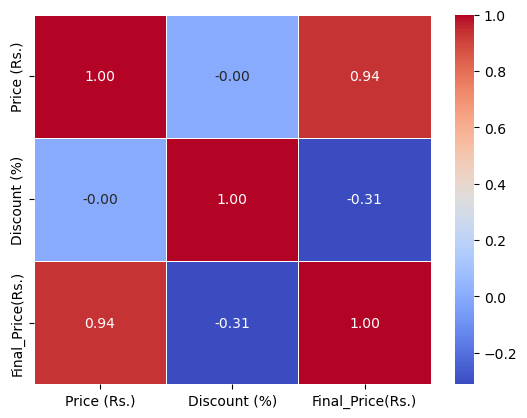

In [116]:
# Sélectionner uniquement les colonnes numériques
numeric_df = df.select_dtypes(include=['number'])

# Calculer la matrice de corrélation
correlation = numeric_df.corr()

sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)